<a href="https://colab.research.google.com/github/YoElvisX/BigData/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ProjectAegisCure: Combating Breast Cancer Through Precision Analytics**




---

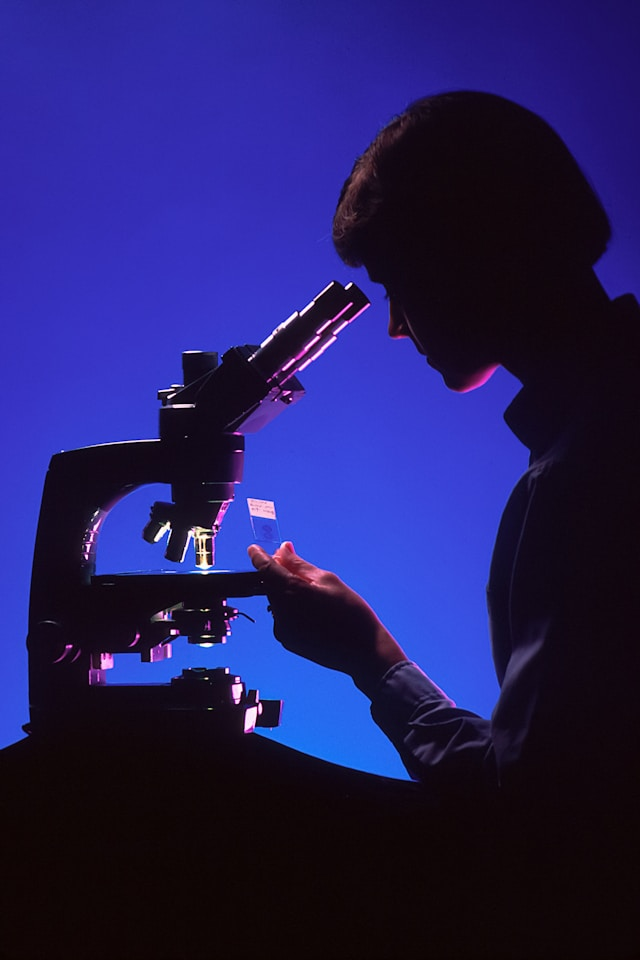

Photo by <a href="https://unsplash.com/@nci?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">National Cancer Institute</a> on <a href="https://unsplash.com/photos/man-in-gray-dress-shirt-holding-black-camera-ct10qdGv1hQ?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  

#**Business Problem**
##Business Problem##
Breast cancer affects both females and males. The rate of occurrence is much higher in females, but [males have a lower five-year survival rate](https://https://www.cancer.gov/news-events/cancer-currents-blog/2019/male-breast-cancer-higher-mortality#:~:text=In%20the%20study%2C%20the%205,JAMA%20Oncology%20on%20September%2019.). Breast cancer is the second leading cause of death for women in the US, after lung cancer. Over 44,000 women, and over 500 males are [expected](https://www.cancer.net/cancer-types/breast-cancer/statistics#:~:text=An%20estimated%202%2C650%20men%20in,after%20the%20cancer%20is%20found.) to die of breast cancer in the US this year.

## The Imperative  

Breast cancer remains a formidable health challenge, claiming thousands of lives each year in the United States alone. While the incidence rate is significantly higher among women, the mortality rate for men diagnosed with breast cancer is alarmingly higher, underscoring the critical need for tailored interventions across genders.

The sobering statistics emphasize the urgency of this issue:
- Breast cancer is the second leading cause of cancer-related deaths among women in the US, surpassed only by lung cancer.
- An estimated 44,000 women and over 500 men are expected to lose their battle against breast cancer this year in the US.
- Despite lower incidence rates, men diagnosed with breast cancer face a staggering lower five-year survival rate compared to their female counterparts.

These figures underscore the pressing need for comprehensive, data-driven strategies to combat breast cancer and improve outcomes for all individuals affected by this devastating disease.


## The Vision

ProjectAegisCure aims to revolutionize breast cancer care by harnessing the power of precision analytics and advanced machine learning techniques. The ambitious initiative seeks to develop a holistic, personalized approach to breast cancer diagnosis, treatment, and survivorship, tailored to the unique biological and psychosocial factors of each individual patient, regardless of gender.

By leveraging vast repositories of clinical data, genomic profiles, imaging scans, and patient-reported outcomes, ProjectAegisCure will create sophisticated predictive models capable of identifying high-risk individuals, optimizing treatment plans, and mitigating adverse outcomes. This data-driven approach will empower healthcare providers with actionable insights, enabling them to deliver truly personalized care and improve survival rates across the board.


## Key Objectives
* Early Detection and Risk Stratification: Develop advanced machine learning models to analyze multi-modal data, including genetic profiles, imaging data, and lifestyle factors, to identify individuals at elevated risk for breast cancer and enable proactive screening and preventive interventions.,
* Precision Diagnostics: Leverage AI-driven image analysis and genomic profiling to improve diagnostic accuracy, characterize tumor subtypes, and guide targeted treatment strategies tailored to each patient's unique molecular profile.
* Treatment Optimization: Implement predictive models to determine the most effective treatment regimens, dosages, and combinations based on individual patient characteristics, minimizing adverse effects and maximizing therapeutic efficacy.
* Survivorship Support: Integrate patient-reported outcomes, psychosocial factors, and long-term follow-up data to develop personalized survivorship plans, addressing the unique challenges faced by breast cancer survivors of all genders.
* Continuous Learning and Improvement: Establish a robust feedback loop to continuously refine and enhance the predictive models, leveraging real-world data and outcomes to drive iterative improvements in breast cancer care delivery.


## Expected Outcomes

By leveraging cutting-edge analytics and machine learning techniques, ProjectAegisCure aims to achieve the following transformative outcomes:

- Improved early detection and risk stratification, enabling timely interventions and potentially reducing mortality rates.
- Enhanced diagnostic accuracy and treatment precision, tailored to each patient's unique biological and psychosocial profile.
- Optimized treatment plans, minimizing adverse effects and maximizing therapeutic efficacy, leading to better quality of life and improved survival rates.
- Comprehensive survivorship support, addressing the long-term physical, psychological, and psychosocial challenges faced by breast cancer survivors of all genders.
- Continuous refinement and advancement of breast cancer care through iterative learning and improvement cycles, driven by real-world data and outcomes.

ProjectAegisCure represents a bold, data-driven initiative to revolutionize breast cancer care, providing a personalized, precision-based approach that transcends gender boundaries and offers hope for improved outcomes and enhanced quality of life for all individuals affected by this devastating disease.


##Metrics##
AUC is chosen as the primary aggregate metric as it provides an assessment of how well a classifier separates the categories of a classifier. Accuracy and recall will also be considered. Accuracy assesses the overall percentage of error, and recall assesses tha rate at which instances that are truly positive (malignant) are correctly classified. We want to minimize false negatives as these instances may go untreated and lead to quicker death. Overall, we need very high AUC, accuracy and recall scores (hopefully above 99%) as this is literally a matter of life and death.

Propensities in the interval [0.3,0.7] will be reported to bring attention to masses that are hard to classify. Propensities will be reported for those instances for which a human specialist diagnosis differs from that of the recommended classifier(s).

#**Executive Summary (BLUF)**
Several models with AUC above 99% and recall above 95% were obtained. A random forest model was developed with AUC mean of 0.992, mean recall of 0.928, and mean accuracy of 0.973. A logistic regression model provided similar performance.

Analysis shows about 7% of the instances have propensities in the [0.3,0.7] range, but the misclassified instances vary across the classifiers.

These classifiers will be solid decision aids. The natural next step, given the criticality of the use case, is to build models using a lot more data, in an effort to squeeze out errors (especially false negatives) altogether.

#**Conclusions from the Preprocessing Notebook**
- No missing value or duplicate pre-processing needed
- Corrected for skewness
- Winsorized outliers in order to preserve data
- Two to three principal components may be sufficient to build a satisfactory model
- The data set is unbalanced (37.26% of the instances are for malignant masses). We can try building the models using the unbalanced data, or we can try SMOTE. There is likely too little data to contemplate undersampling.

#**Libraries**

In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
from matplotlib.colors import ListedColormap

In [ ]:
# LightGBM Library
!pip install lightgbm
from lightgbm import LGBMClassifier

In [ ]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score

In [ ]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

In [ ]:
# mblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer

#**Data**


This notebook examines classifier solutions for the Wisconsin Breast Cancer Dataset, available here: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

## Patient Information
- **ID Number**: Unique identifier for each patient.

## Diagnostic Output
- **Diagnosis**: The classification of the breast tissue where 'M' stands for malignant (cancerous) and 'B' stands for benign (non-cancerous).

## Features Computed from Cell Nuclei
Each feature has three measurements: the mean, standard error (se), and the worst (mean of the three largest values).

### Mean Features
1. **Radius (mean)**: Average of distances from center to points on the perimeter.
2. **Texture (mean)**: Standard deviation of gray-scale values.
3. **Perimeter (mean)**: Average size of the core tumor.
4. **Area (mean)**: Average area of the tumor.
5. **Smoothness (mean)**: Local variation in radius lengths.
6. **Compactness (mean)**: Perimeter^2 / area - 1.0.
7. **Concavity (mean)**: Severity of concave portions of the contour.
8. **Concave Points (mean)**: Number of concave portions of the contour.
9. **Symmetry (mean)**.
10. **Fractal Dimension (mean)**: "Coastline approximation" - 1.

### Standard Error Features
- Corresponding standard error for each mean feature, e.g., `Radius se`, `Texture se`, etc.

### Worst Features
- Mean of the three largest values for each feature, e.g., `Radius worst`, `Texture worst`, etc.

## Notes
- The features are calculated from a digitized image of a fine needle aspirate (FNA) of a breast mass, describing characteristics of the cell nuclei present in the image.
- The dataset is extensively used for machine learning and statistical modeling to predict the likelihood of a breast mass being benign or malignant.

This comprehensive dataset offers crucial insights for developing advanced diagnostic models in the medical field, particularly in the detection and analysis of breast cancer.


In [ ]:
# Read in data from the sklearn library
cancer = load_breast_cancer()

# Column 1 is the target (1=malignant, 0 = benign)
df = pd.DataFrame(np.c_[cancer['target'],cancer['data']], columns = np.append(['target'],cancer['feature_names']))

# Plot the last 5 rows of the data
df.tail()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,1.0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


#**Separate Predictors & Target, Encode Target**


In [ ]:
# Create binary-encoded target column (y)
y = df.loc[:,'target']
#Drop ID and old target column to get predictors (X)
X = df.drop(columns='target')

#**Outliers**

Column  target :  []
Column  mean radius :  [82, 108, 122, 164, 180, 202, 212, 236, 272, 339, 352, 368, 369, 393, 461, 503, 521, 564]
Column  mean texture :  [219, 232, 239, 259, 265, 455, 562]
Column  mean perimeter :  [82, 108, 122, 164, 180, 202, 212, 236, 272, 339, 352, 369, 393, 461, 503, 521]
Column  mean area :  [101, 212, 461, 538, 539, 568]
Column  mean smoothness :  [3, 105, 122, 504, 520, 568]
Column  mean compactness :  [178]
Column  mean concavity :  []
Column  mean concave points :  []
Column  mean symmetry :  [3, 22, 25, 60, 78, 108, 122, 146, 150, 152, 258, 288, 323, 424, 561]
Column  mean fractal dimension :  [3, 277]
Column  radius error :  [212]
Column  texture error :  [12, 192, 473, 561]
Column  perimeter error :  []
Column  area error :  []
Column  smoothness error :  [116, 122, 149, 192, 213, 263, 314, 489, 505]
Column  compactness error :  [178, 190, 315]
Column  concavity error :  [68, 152]
Column  concave points error :  [12, 68, 101, 140, 152, 174, 175, 192, 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

           target  mean radius  mean texture  mean perimeter   mean area  \
count  569.000000   569.000000    569.000000      569.000000  569.000000   
mean     0.627417    14.053968     19.217838       91.354534    3.495239   
std      0.483918     3.180805      3.898115       21.781108    0.115203   
min      0.000000     9.504000     13.080000       60.340000    3.288744   
25%      0.000000    11.700000     16.170000       75.170000    3.413962   
50%      1.000000    13.370000     18.840000       86.240000    3.487543   
75%      1.000000    15.780000     21.800000      104.100000    3.576776   
max      1.000000    20.580000     27.150000      135.900000    3.696532   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096103         -2.303507       -2.217871            -2.755824   
std           0.012455          0.433419        0.573979             0.5

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


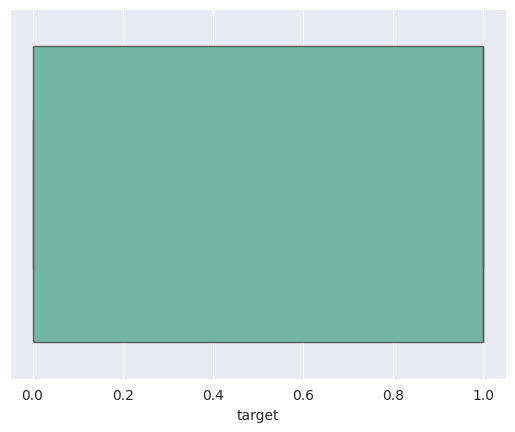

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


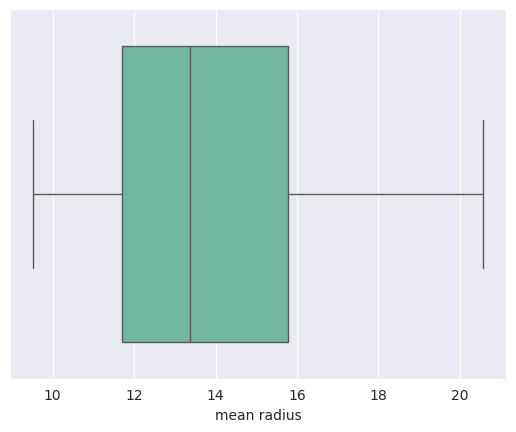

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


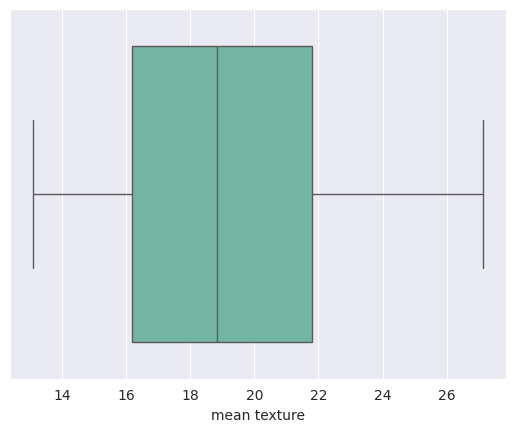

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


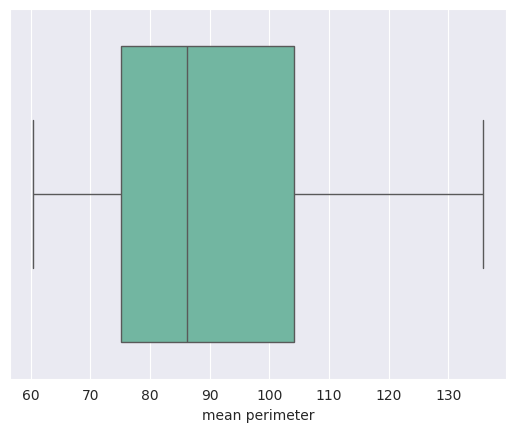

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


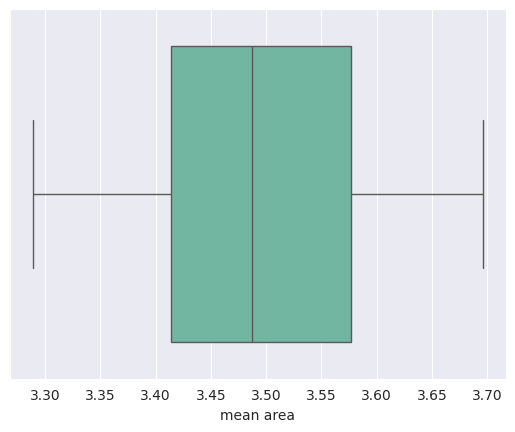

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


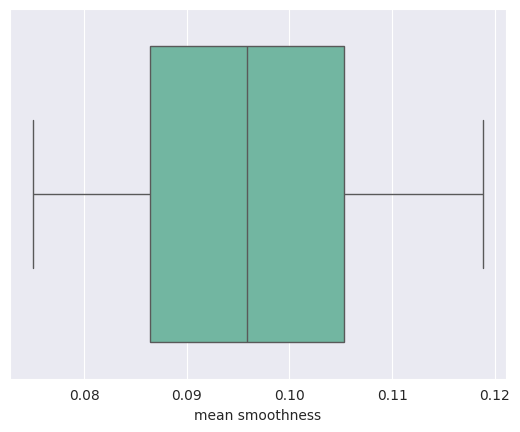

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


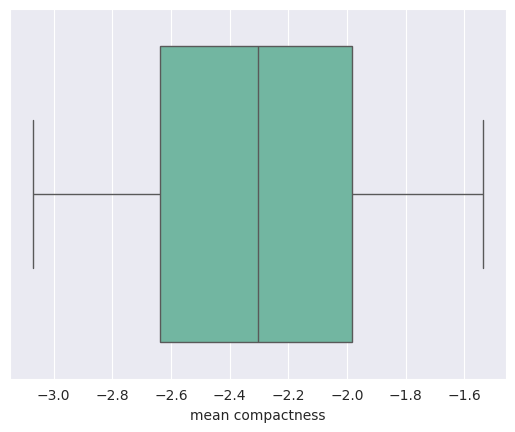

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


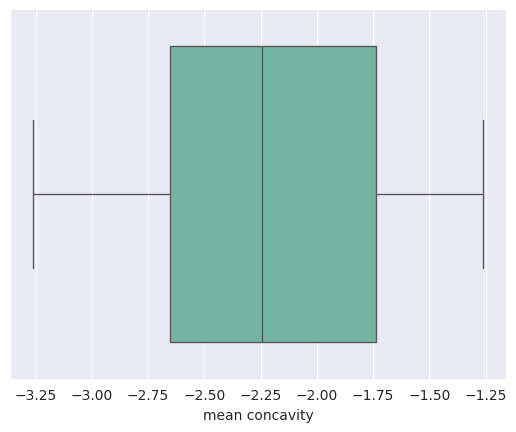

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


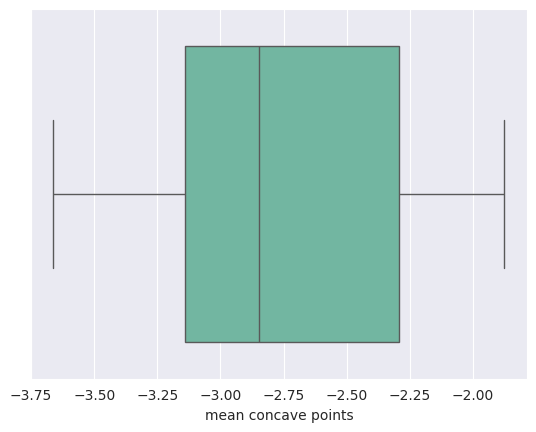

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


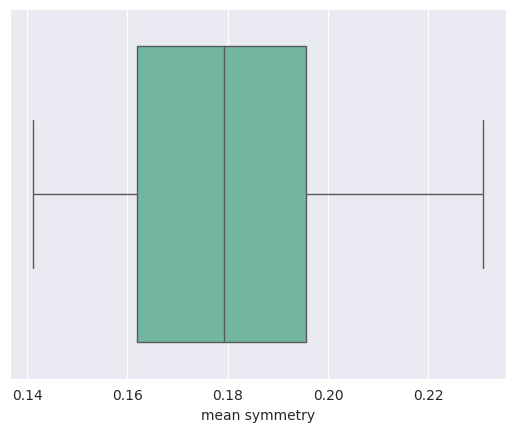

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


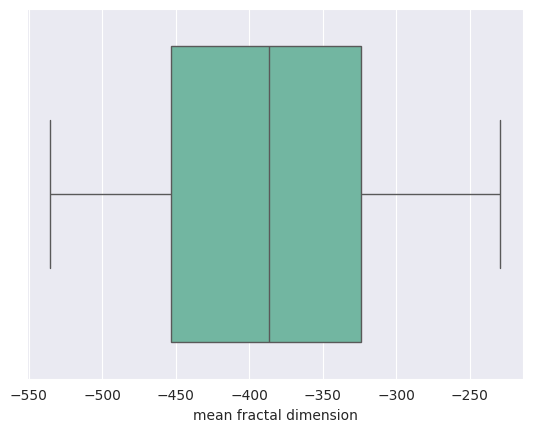

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


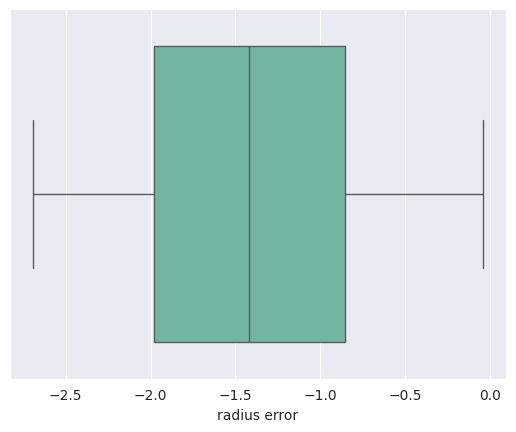

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


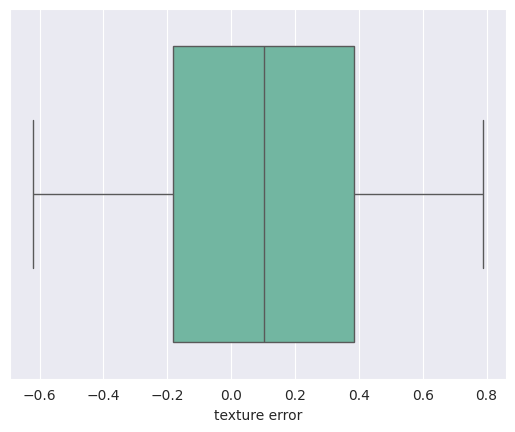

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


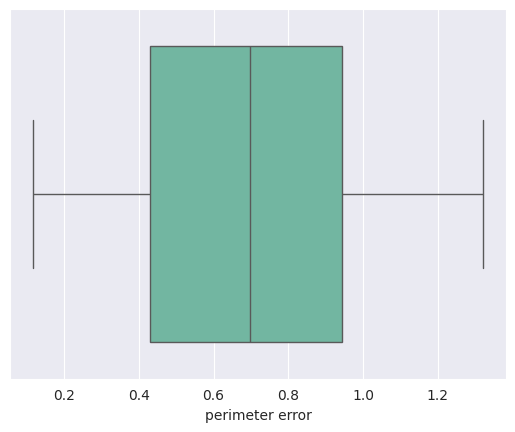

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


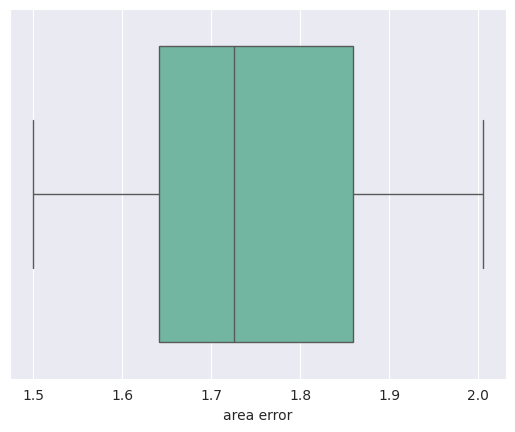

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


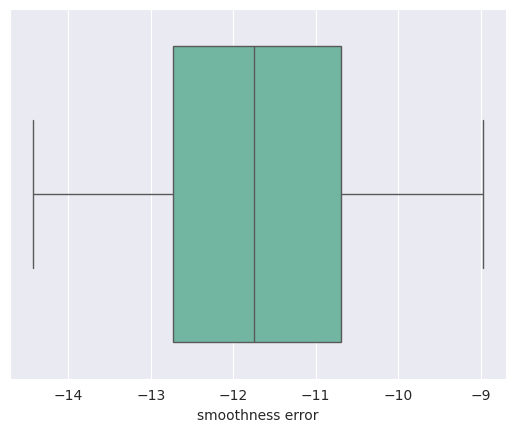

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


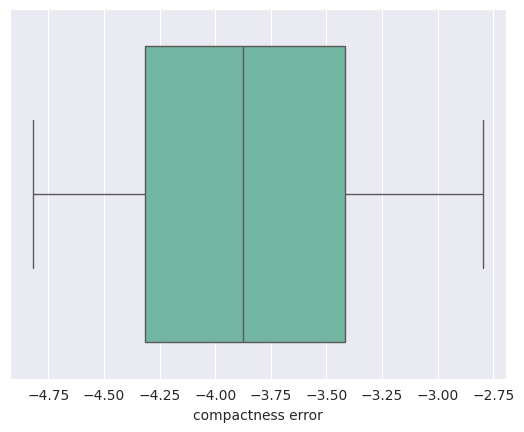

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


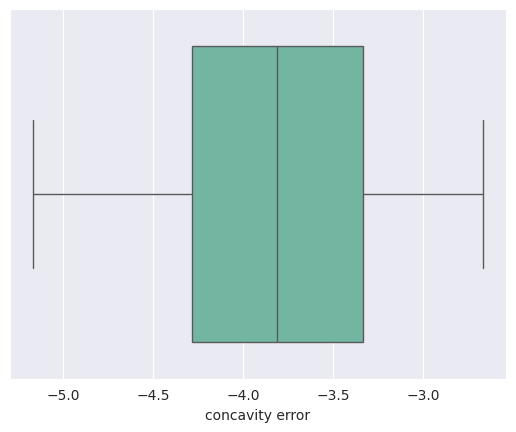

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


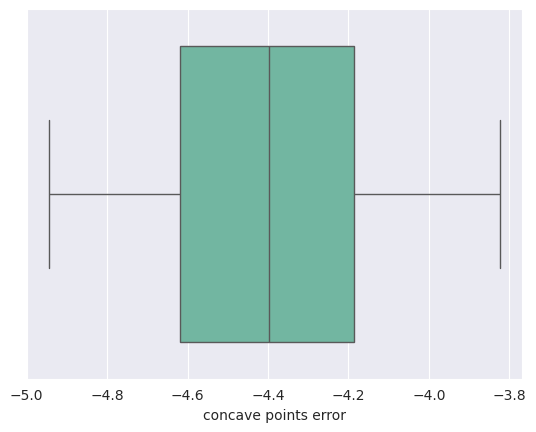

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


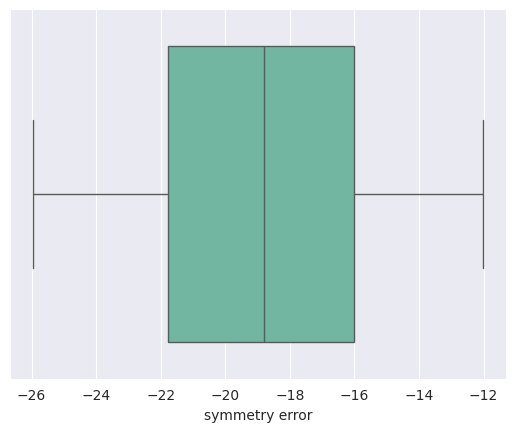

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


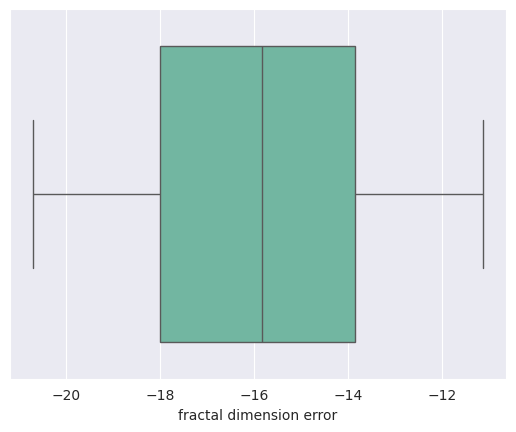

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


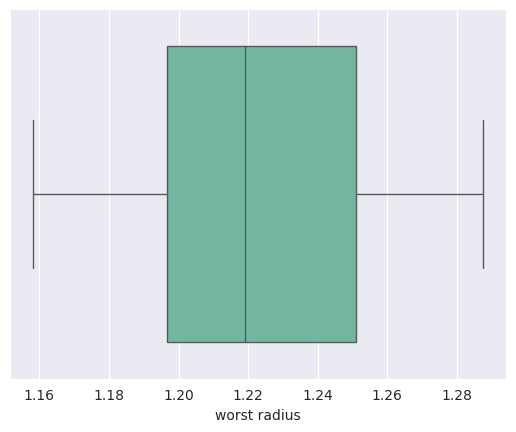

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


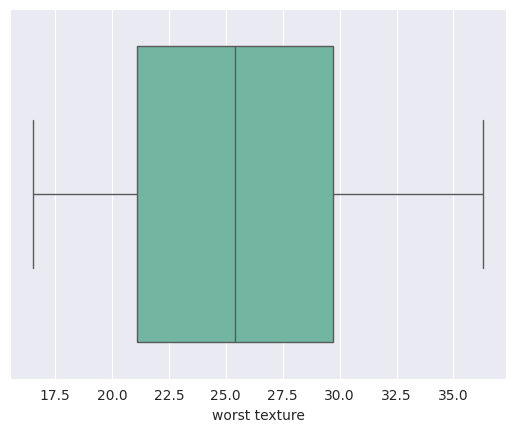

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


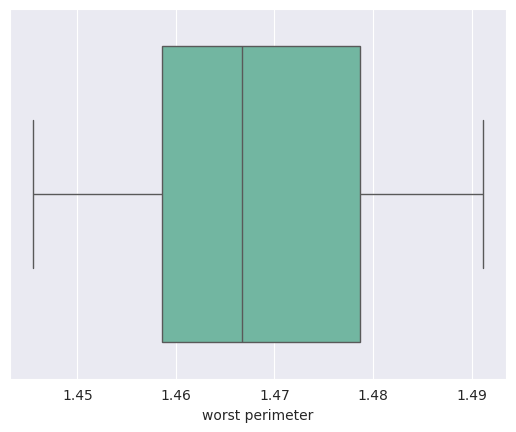

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


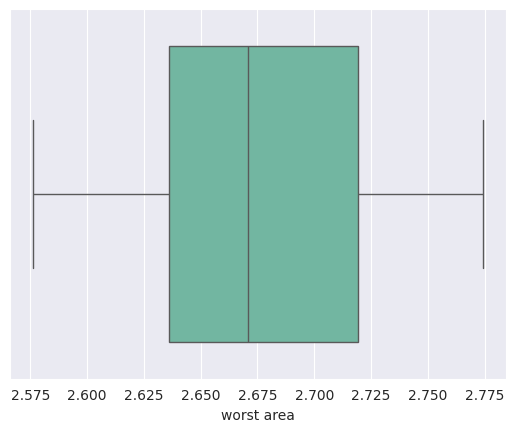

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


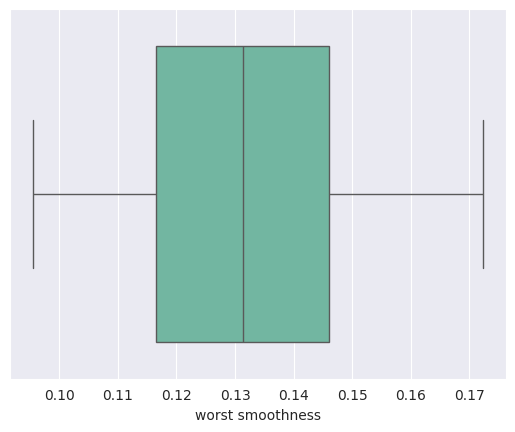

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


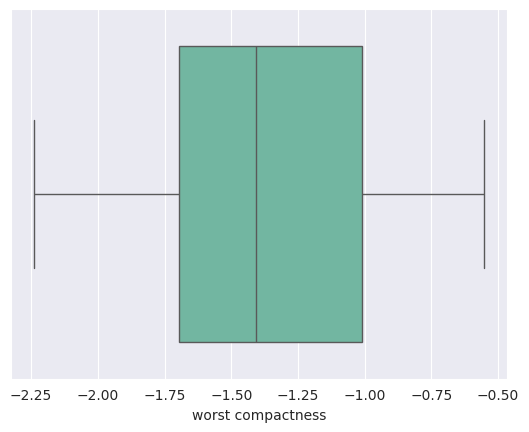

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


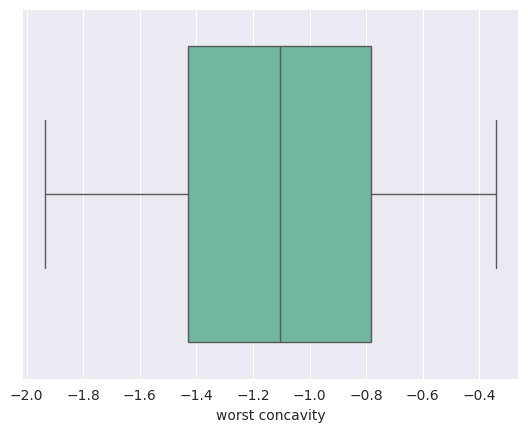

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


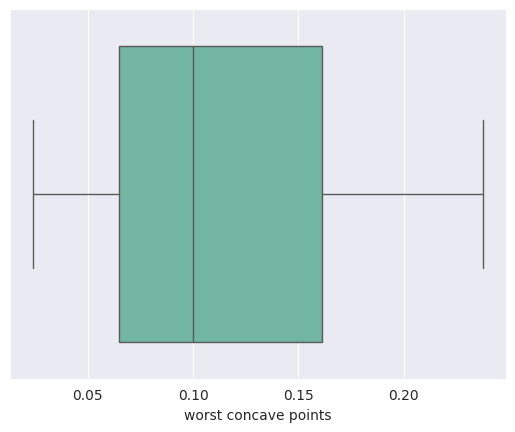

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


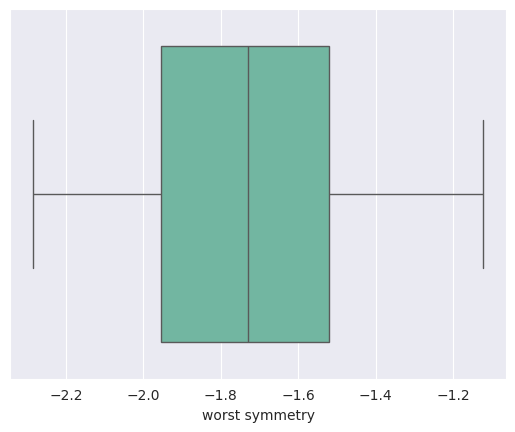

<ipython-input-10-b0a2da54e0a1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")


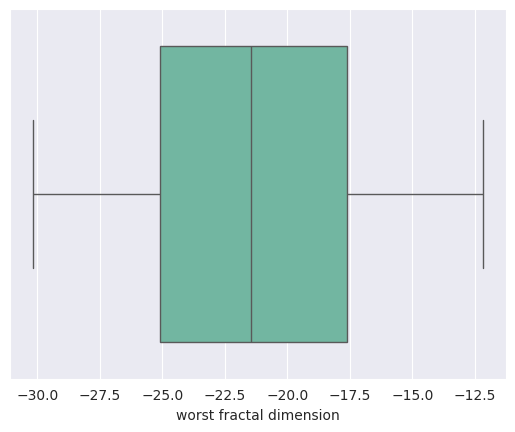

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.

cols = X.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)
  print("Column ",i,": ",outliers_Tukey)

# Windsorize X and check the results
print("Before", X.describe())
X_winsorized = X.copy(deep=True)
for i in cols:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))
print("After", X_winsorized.describe())
for i in cols:
  ax = sns.boxplot(data=X_winsorized[i], orient="h", palette="Set2")
  plt.show()

Conclusions: target is unbalanced (approx 37% malignant). Oversampling may improve classifier performance. Many columns have high skewness meriting correction.

#**Holdout Sample**

Source: https://www.researchgate.net/publication/334119803_Secure_Learning_para_deteccion_de_Android_Malware/figures?lo=1
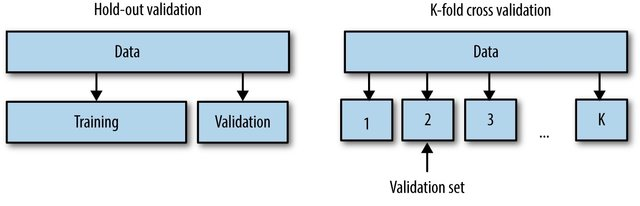

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0,
                     stratify=y)
print('Shape of X and y',X.shape, y.shape, '\nShape of training set X and y',X_train.shape, y_train.shape, '\nShape of test set X and y',X_test.shape, y_test.shape)


Shape of X and y (569, 31) (569,) 
Shape of training set X and y (455, 31) (455,) 
Shape of test set X and y (114, 31) (114,)


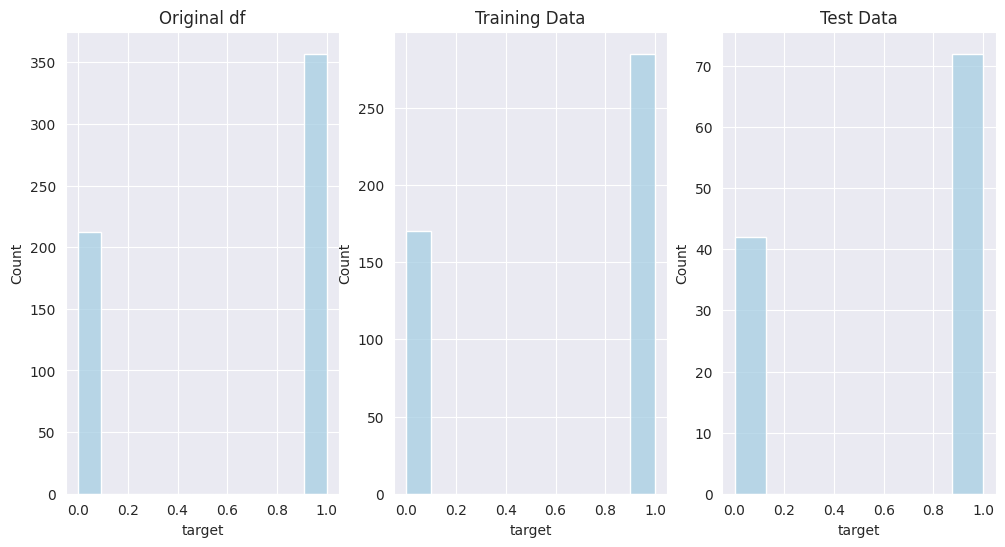

In [ ]:
# Distribution of the target variable ('M')
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
sns.histplot(data=y).set_title("Original df")
plt.subplot(1,3,2)
sns.histplot(data=y_train).set_title("Training Data")
plt.subplot(1,3,3)
sns.histplot(data=y_test).set_title("Test Data")
plt.show()


#**Scaling**
* Standardizing involves the transformation of data into z-scores (by subtracting the feature mean and divding by the feature standard deviation). It's purpose is to ensure all features are on a common scale without distorting the relative differences between the instance values. Use standardizaition when there is no natural upper or lower bound for the feature in the use case.
* Normalization involves conversion of feature values to an interval (typically [0,1]). Use normalization when a feature has an upper and lower bound in the use case.


In [ ]:
# Scaling:normalization or standardization
# SCALE AFTER SPLITTING TO AVOID DATA LEAKAGE!!!
# Scale quant features with bounds using Min-Max (normalizing) scaler, otherwise standardize

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Min-max scaler will not be used here based upon the assumption that all of the features are unbounded above.
# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
#mms = MinMaxScaler()
#X_train_norm = mms.fit_transform(X_train)
#X_test_norm = mms.transform(X_test)
#print(X_train_norm)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()  #we fit the StandardScaler class only once—on the training data—and use those parameters to transform the test dataset or any new data point.
X_train_std = pd.DataFrame(stdsc.fit_transform(X_train))
X_test_std = pd.DataFrame(stdsc.transform(X_test))

print("Checking: mean of column 0 of X_train:",X_train_std[0].mean(), " and its std deviation:", X_train_std[0].std())

Checking: mean of column 0 of X_train: 3.9040809657148365e-17  and its std deviation: 1.0011007157982685


#**Logistic Regression Classifier**

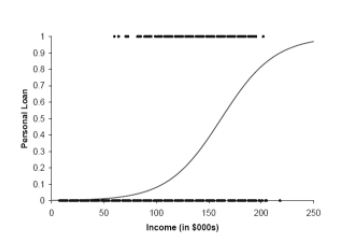

In [ ]:
# Get started with logistic regression (logit) classifier
clm = LogisticRegression(random_state=1, solver='sag',max_iter=1000,class_weight='balanced')     # Create logit model specifying random number seed to get repeatable results, use sag solver as lbfgs does not converge
                                                                 # The following guidance about solvers is taken from the sklearn documentation:
                                                                 # For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
                                                                 # For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
                                                                 # ‘liblinear’ is limited to one-versus-rest schemes.

clm.fit(X_train_std, np.ravel(y_train))            # Fit model using training data. Ravel converts a column vector into the required 1D array format.
y_pred = clm.predict(X_test_std)                                 # Apply model to test data
print('Logit: AUC = ', roc_auc_score(y_test,y_pred), ' recall =', recall_score(y_test, y_pred),' accuracy = ', accuracy_score(y_test, y_pred))    # Test set accuracy
print(confusion_matrix(y_true=y_test,y_pred=y_pred))                           # Confusion matrix
print("Logit Model Coefficients",list(clm.coef_))                # Logistic coefficients (can be used to assess which variables have the largest effect size in the model)


Logit: AUC =  1.0  recall = 1.0  accuracy =  1.0
[[42  0]
 [ 0 72]]
Logit Model Coefficients [array([ 2.97343950e+00, -2.35934026e-01, -3.12682010e-01, -2.32486589e-01,
       -2.19256955e-01, -1.44938949e-01,  6.11769468e-02, -2.64656880e-01,
       -3.81896349e-01, -6.41212077e-02,  8.74236414e-02, -4.15423579e-01,
       -4.34262607e-02, -3.34516527e-01, -4.30491942e-01,  1.58699093e-01,
        2.56362716e-01,  2.91298993e-03, -1.85096687e-01,  2.88885979e-01,
        1.41519523e-01, -3.13631663e-01, -3.61565654e-01, -2.91870285e-01,
       -3.25747619e-01, -3.55110167e-01, -2.67236997e-02, -2.98569094e-01,
       -4.35770032e-01, -2.07775548e-01, -1.27745462e-01])]


In [ ]:
# Examine propensities of logit model
logit_propensities = pd.DataFrame(clm.predict_proba(X_test_std))

# Create a dataframe showing actuals, predicted, and propensities
y_pred = pd.DataFrame(y_pred)
y_pred.reset_index(drop = True , inplace = True)
y_test.reset_index(drop = True , inplace = True)
results = pd.concat([y_test, y_pred, logit_propensities[1]], axis=1)
results.columns= ['Actual','Predicted','Propensity']

#Compute percentage of instances with propensities in [lower_limit,upper_limit]
upper_limit = 0.7
lower_limit = 0.3
count = 0
for i in range(0,len(logit_propensities[1])):
  if((logit_propensities.loc[i,1] >= lower_limit) & (logit_propensities.loc[i,1] <= upper_limit)):
    count = count + 1
print('Percentage of test instances with propensity in [%1.2f, %1.2f]: %3.2f' % (lower_limit,upper_limit,100 * count/len(logit_propensities[1])))

# Show instances where predicted and actual differ
print('Instances for which actual and predicted differ:')
discrepancies = results.loc[results['Actual'] != results['Predicted']]
discrepancies


Percentage of test instances with propensity in [0.30, 0.70]: 0.00
Instances for which actual and predicted differ:


,Actual,Predicted,Propensity


In [ ]:
results

,Actual,Predicted,Propensity
0,0.0,0.0,0.003614
1,0.0,0.0,0.000005
2,0.0,0.0,0.006165
3,1.0,1.0,0.996757
4,0.0,0.0,0.005978
...,...,...,...
109,0.0,0.0,0.001087
110,0.0,0.0,0.001149
111,1.0,1.0,0.982697
112,1.0,1.0,0.995643


Test Accuracy: 0.974
[[41  1]
 [ 2 70]]


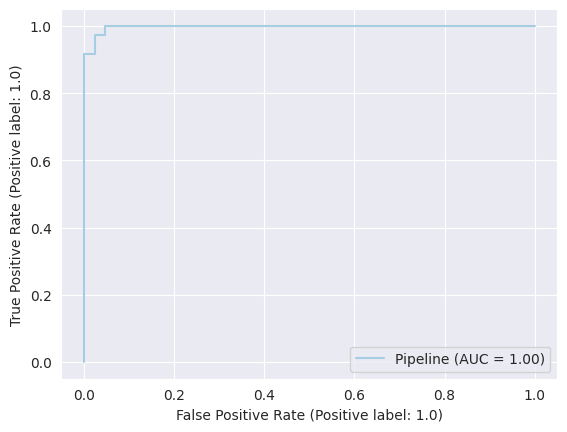

In [ ]:
# In pursuit of a competitive model with a much smaller number of predictors, create a pipeline that scales, performs PCA, and fits and scores a logit model
# Use weights to a) offset the effect of the imbalance in the target column (212 M out of 569 total), and b) emphasize that a false negative may be much worse than a false positive

weights = {0:0.8, 1:0.2} # The weights are supposed to penalize errors in the classes. So, if we think false positives are 4 times "worse" than false negatives
                         # we should set the weights to be {0:0.2, 1:0.8}. But the implementation in sklearn appears to be backwards, so experiment with this
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        LogisticRegression(random_state=1,solver='sag',class_weight=weights))

pipe_lr.fit(X_train_std, np.ravel(y_train))
y_pred = pipe_lr.predict(X_test_std)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_std, y_test))
print(confusion_matrix(y_test,y_pred,labels=[0,1]))                           # Confusion matrix
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(
        pipe_lr, X_test_std, y_test,
    )


In [ ]:
# Review propensities and misclassifications from PCA solution
pipe_lr_propensities = pd.DataFrame(clm.predict_proba(X_test_std))

# Create a dataframe showing actuals, predicted, and propensities
y_pred = pd.DataFrame(y_pred)
y_pred.reset_index(drop = True , inplace = True)
y_test.reset_index(drop = True , inplace = True)
results = pd.concat([y_test, y_pred, pipe_lr_propensities[1]], axis=1)
results.columns= ['Actual','Predicted','Propensity']

#Compute percentage of instances with propensities in [lower_limit,upper_limit]
upper_limit = 0.7
lower_limit = 0.3
count = 0
for i in range(0,len(pipe_lr_propensities[1])):
  if((pipe_lr_propensities.loc[i,1] >= lower_limit) & (pipe_lr_propensities.loc[i,1] <= upper_limit)):
    count = count + 1
print('Percentage of test instances with propensity in [%1.2f, %1.2f]: %3.2f' % (lower_limit,upper_limit,100 * count/len(pipe_lr_propensities[1])))

# Show instances where predicted and actual differ
print('Instances for which actual and predicted differ:')
discrepancies = results.loc[results['Actual'] != results['Predicted']]
discrepancies


Percentage of test instances with propensity in [0.30, 0.70]: 0.00
Instances for which actual and predicted differ:


,Actual,Predicted,Propensity
42,1.0,0.0,0.926933
46,1.0,0.0,0.947320
54,0.0,1.0,0.142310


In [ ]:
# Add cross-validation
weights = {0:0.2, 1:0.8} # The weights are supposed to penalize errors in the classes. So, if we think false positives are 4 times "worse" than false negatives
                         # we should set the weights to be {0:0.2, 1:0.8}. But the implementation in sklearn appears to be backwards, so experiment with this
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        LogisticRegression(random_state=1,solver='sag',class_weight=weights))

scores = cross_val_score(pipe_lr, X, y, cv=5, n_jobs = -1,scoring='roc_auc')
print('CV AUC scores: {}'.format(scores))
print('CV AUC mean: {} and std deviation: {}'.format(np.mean(scores), np.std(scores)))

scores = cross_val_score(pipe_lr, X, y, cv=5, n_jobs = -1,scoring='recall')
print('CV recall scores: {}'.format(scores))
print('CV recall mean: {} and std deviation: {}'.format(np.mean(scores), np.std(scores)))

scores = cross_val_score(pipe_lr, X, y, cv=5, n_jobs = -1)
print('CV accuracy scores: {}'.format(scores))
print('CV accuracy mean: {} and std deviation: {}'.format(np.mean(scores), np.std(scores)))

CV AUC scores: [0.99574189 0.99836227 0.99900794 0.98875661 1.        ]
CV AUC mean: 0.9963737420214656 and std deviation: 0.004061104123799618
CV recall scores: [1. 1. 1. 1. 1.]
CV recall mean: 1.0 and std deviation: 0.0
CV accuracy scores: [0.96491228 0.96491228 0.98245614 0.97368421 1.        ]
CV accuracy mean: 0.9771929824561404 and std deviation: 0.013128622409733122


#**Other Classifiers**

In [ ]:
# Try other classifiers

names = ["Decision Tree", "k Nearest Neighbors", "SVM", "MLP", "Random Forest", "XGBoost", "Light GBM"]
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(3),
    SVC(),
    MLPClassifier(hidden_layer_sizes=(20,20),alpha=1, max_iter=500),
    RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]

for name, clf in zip(names, classifiers):
  pipe_many = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        clf)
  scores = cross_val_score(estimator=pipe_many,
                             X=X_train,
                             y=np.ravel(y_train),
                             cv=10,     #Reduced to three folds for execution speed
                             n_jobs=1,
                            scoring='roc_auc')
  print("Classifier: ",name)
  print('CV AUC scores: {}'.format(scores))
  print('CV AUC mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))
  print("\n\n")

Classifier:  Decision Tree
CV AUC scores: [0.97058824 0.95334686 0.93407708 0.97058824 0.97058824 0.95168067
 0.94957983 0.96953782 0.96428571 0.98214286]
CV AUC mean:0.9616415531729933 and std:0.013427888396339205



Classifier:  k Nearest Neighbors
CV AUC scores: [0.9979716  0.9979716  0.98073022 0.96551724 0.97058824 1.
 1.         1.         0.99684874 1.        ]
CV AUC mean:0.9909627644161112 and std:0.01275491988299909



Classifier:  SVM
CV AUC scores: [1.         0.9979716  1.         1.         0.98377282 1.
 1.         1.         0.99789916 1.        ]
CV AUC mean:0.997964358157056 and std:0.004800113931400108



Classifier:  MLP
CV AUC scores: [1.         0.9979716  1.         1.         0.99188641 1.
 1.         1.         0.98529412 1.        ]
CV AUC mean:0.9975152129817444 and std:0.00473778486394379



Classifier:  Random Forest
CV AUC scores: [1.         0.9959432  0.9959432  0.9979716  0.96146045 1.
 0.99579832 1.         0.99369748 0.99579832]
CV AUC mean:0.99366125

#**Oversampling with SMOTE**

In [ ]:
# Try SMOTE with cross validation using a logit model
# Borrowing code from https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['pca', PCA(n_components = 5)],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, np.ravel(y_train))
test_score = grid_search.score(X_test, y_test)

print(f'Test set ROC score: {test_score}')
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Test set ROC score: 0.9871031746031745
{'classifier__C': 0.1}
Pipeline(steps=[('smote', SMOTE(random_state=11)), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ['classifier',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=11)]])


In [ ]:
#Try other classifiers with SMOTE and cross validation
names = ["Decision Tree", "k Nearest Neighbors", "SVM", "MLP", "Random Forest", "XGBoost", "Light GBM"]
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(3),
    MLPClassifier(hidden_layer_sizes=(20,20),alpha=1, max_iter=500),
    SVC(),
    RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]

# Build each classifier using the unbalanced TRAINING data, show decision region and petrformance of the unbalanced TEST data
no_folds = 5 # number of folds desired for cross validation
kf = StratifiedKFold(n_splits=no_folds, shuffle=True, random_state=12345)
for name, clf in zip(names, classifiers):
  print('CLASSIFIER: ',name,'\n')
  mean_accuracy = 0.0
  mean_recall = 0.0
  mean_auc = 0.0
  for fold, (train_index, test_index) in enumerate(kf.split(X,y),1):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    sm = SMOTE()
    X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, np.ravel(y_train))
    stdsc = StandardScaler()
    X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
    X_test_std = stdsc.transform(X_test)
    pca = PCA()
    X_train_pca=pca.fit_transform(X_train_SMOTE_std)
    X_test_pca=pca.transform(X_test_std)
    clf.fit(X_train_pca, np.ravel(y_train_SMOTE))
    y_pred = clf.predict(X_test_pca)
    print(f'For fold {fold}:')
    print(f'Accuracy: {clf.score(X_test_pca, y_test)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'AUC: {roc_auc_score(y_test, y_pred)}')
    mean_accuracy = mean_accuracy + clf.score(X_test_pca, y_test)
    mean_recall = mean_recall + recall_score(y_test, y_pred)
    mean_auc = mean_auc + roc_auc_score(y_test, y_pred)
  mean_accuracy = mean_accuracy / no_folds
  mean_recall = mean_recall / no_folds
  mean_auc = mean_auc / no_folds
  print('Average accuracy: %.3f Average recall: %.3f Average AUC: %.3f\n\n' % (mean_accuracy, mean_recall, mean_auc))

CLASSIFIER:  Decision Tree 

For fold 1:
Accuracy: 1.0
Recall: 1.0
AUC: 1.0
For fold 2:
Accuracy: 0.9912280701754386
Recall: 1.0
AUC: 0.9883720930232558
For fold 3:
Accuracy: 1.0
Recall: 1.0
AUC: 1.0
For fold 4:
Accuracy: 1.0
Recall: 1.0
AUC: 1.0
For fold 5:
Accuracy: 1.0
Recall: 1.0
AUC: 1.0
Average accuracy: 0.998 Average recall: 1.000 Average AUC: 0.998


CLASSIFIER:  k Nearest Neighbors 

For fold 1:
Accuracy: 0.9122807017543859
Recall: 0.9295774647887324
AUC: 0.9066491975106453
For fold 2:
Accuracy: 0.9473684210526315
Recall: 0.9577464788732394
AUC: 0.9439895185063871
For fold 3:
Accuracy: 0.9385964912280702
Recall: 0.9305555555555556
AUC: 0.941468253968254
For fold 4:
Accuracy: 0.9122807017543859
Recall: 0.9305555555555556
AUC: 0.9057539682539683
For fold 5:
Accuracy: 0.9292035398230089
Recall: 0.9154929577464789
AUC: 0.9339369550637157
Average accuracy: 0.928 Average recall: 0.933 Average AUC: 0.926


CLASSIFIER:  SVM 

For fold 1:
Accuracy: 0.9824561403508771
Recall: 1.0
AUC: 0

The leaderboard is now as follows:
Classifier performance results are ordered by AUC.

|**Classifier** |    AUC    |       Accuracy      |    Recall    |
|:----------------------|:------------:|:--------------:|:-------------:|
|Random Forest | 0.995 | 0.996 | 1 |
|Multilayer Perceptron | 0.998 | 0.998 | 1 |
|Decisiom Tree | 0.998 | 0.998 | 1 |
|Support Vector Machine | 0.992 | 0.993 | 0.997 |
|LightGBM | 0.976 |  0.977 | 0.981 |
|XGBoost | 0.969 | 0.972 | 0.980 |
|kNN | 0.922 | 0.923 | 0.924 |

Pick the RF model as the winner


In [ ]:
# There are likely a number of classifiers in the Rashomon Set
# We'll pick the random forest model and optimize the hyperparameters

RF_params = {'criterion':['gini','entropy'],'max_depth':[7,10,15],'class_weight':[{0:0.1, 1:0.9}, {0:0.15, 1:0.85}, {0:0.2, 1:0.8}, {0:0.25, 1:0.75}]}
clf = GridSearchCV(RandomForestClassifier(oob_score=True), RF_params, cv=3,scoring='roc_auc')
clf.fit(X_train_SMOTE_std, np.ravel(y_train_SMOTE))
y_pred = clf.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))
print(clf.best_params_, clf.best_score_)
print("Accuracy = ",accuracy_score(y_test, y_pred))
print("Recall = ",recall_score(y_test, y_pred))


[[42  0]
 [ 1 70]]
{'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': 10} 1.0
Accuracy =  0.9911504424778761
Recall =  0.9859154929577465


In [ ]:
# Review propensities and misclassifications from PCA solution
clf = RandomForestClassifier(oob_score=True,class_weight= {0: 0.2, 1: 0.8}, criterion='gini',max_depth=7)
clf_propensities = pd.DataFrame(clf.fit(X_train_SMOTE_std, np.ravel(y_train_SMOTE)).predict_proba(X_test_std))

# Create a dataframe showing actuals, predicted, and propensities
y_pred = pd.DataFrame(y_pred)
y_pred.reset_index(drop = True , inplace = True)
y_test.reset_index(drop = True , inplace = True)
results = pd.concat([y_test, y_pred, clf_propensities[1]], axis=1)
results.columns= ['Actual','Predicted','Propensity']

#Compute percentage of instances with propensities in [lower_limit,upper_limit]
upper_limit = 0.7
lower_limit = 0.3
count = 0
for i in range(0,len(clf_propensities[1])):
  if((clf_propensities.loc[i,1] >= lower_limit) & (clf_propensities.loc[i,1] <= upper_limit)):
    count = count + 1
print('Percentage of test instances with propensity in [%1.2f, %1.2f]: %3.2f' % (lower_limit,upper_limit,100 * count/len(clf_propensities[1])))

# Show instances where predicted and actual differ
print('Instances for which actual and predicted differ:')
discrepancies = results.loc[results['Actual'] != results['Predicted']]
discrepancies

Percentage of test instances with propensity in [0.30, 0.70]: 1.77
Instances for which actual and predicted differ:


,Actual,Predicted,Propensity
99,1.0,0.0,0.46


# Quanitfy the performance difference between data balancing and cost sensitivity

In [ ]:
# Define classifiers
names = ["Decision Tree", "k Nearest Neighbors", "SVM", "MLP", "Random Forest", "XGBoost", "Light GBM"]
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(3),
    SVC(),
    MLPClassifier(hidden_layer_sizes=(20,20), alpha=1, max_iter=500),
    RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                    learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
]

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Classifier', 'Delta from Balancing', 'Average Accuracy', 'Average Recall', 'Average AUC'])

# Set up cross-validation
no_folds = 5
kf = StratifiedKFold(n_splits=no_folds, shuffle=True, random_state=12345)

# Function to calculate delta from balancing
def calculate_delta_balancing(clf, X_train, y_train, X_test, y_test):
    # Accuracy before balancing
    clf.fit(X_train, y_train)
    y_pred_before = clf.predict(X_test)
    accuracy_before = balanced_accuracy_score(y_test, y_pred_before)

    # Balancing the data using SMOTE
    sm = SMOTE()
    X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

    # Accuracy after balancing
    clf.fit(X_train_SMOTE, y_train_SMOTE)
    y_pred_after = clf.predict(X_test)
    accuracy_after = balanced_accuracy_score(y_test, y_pred_after)

    # Calculating delta from balancing
    return accuracy_after - accuracy_before

# Evaluate the performance for each classifier
for name, clf in zip(names, classifiers):
    deltas_balancing = []
    mean_accuracy = 0.0
    mean_recall = 0.0
    mean_auc = 0.0

    for fold, (train_index, test_index) in enumerate(kf.split(X,y),1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Calculating delta from balancing
        delta_balancing = calculate_delta_balancing(clf, X_train, y_train, X_test, y_test)
        deltas_balancing.append(delta_balancing)

        # Calculating performance metrics
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        mean_accuracy += balanced_accuracy_score(y_test, y_pred)
        mean_recall += recall_score(y_test, y_pred)
        mean_auc += roc_auc_score(y_test, y_pred)

    mean_accuracy /= no_folds
    mean_recall /= no_folds
    mean_auc /= no_folds

    mean_delta_balancing = sum(deltas_balancing) / len(deltas_balancing)

    results_df = results_df.append({'Classifier': name,
                                    'Delta from Balancing': mean_delta_balancing,
                                    'Average Accuracy': mean_accuracy,
                                    'Average Recall': mean_recall,
                                    'Average AUC': mean_auc},
                                   ignore_index=True)

# Print results
print(results_df)


<ipython-input-25-d553743c5a97>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name,
<ipython-input-25-d553743c5a97>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name,
<ipython-input-25-d553743c5a97>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name,
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: Converge

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4559
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[Ligh

<ipython-input-25-d553743c5a97>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name,


In [ ]:
results_df

,Classifier,Delta from Balancing,Average Accuracy,Average Recall,Average AUC
0,Decision Tree,0.000000,1.000000,1.000000,1.000000
1,k Nearest Neighbors,-0.001617,0.897854,0.946870,0.897854
2,SVM,0.069144,0.838647,0.988811,0.838647
3,MLP,0.011368,0.975706,0.988732,0.975706
4,Random Forest,-0.000075,0.989309,0.997222,0.989309
5,XGBoost,0.000000,1.000000,1.000000,1.000000
6,Light GBM,0.000000,1.000000,1.000000,1.000000


In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Define classifiers
names = ["Decision Tree", "k Nearest Neighbors", "SVM", "MLP", "Random Forest", "XGBoost", "Light GBM"]
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(3),
    SVC(),
    MLPClassifier(hidden_layer_sizes=(20,20), alpha=1, max_iter=500),
    RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                    learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
]

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Classifier','Delta from Cost Sensitivity'])

# Set up cross-validation
no_folds = 5
kf = StratifiedKFold(n_splits=no_folds, shuffle=True, random_state=12345)

# Function to calculate delta from cost sensitivity
def calculate_delta_cost_sensitivity(y_test, y_pred):
    # Assuming that class 1 is the minority class
    cost_matrix = [[0, 1], [5, 0]]  # Custom cost matrix, where misclassifying minority class is costlier
    cm = confusion_matrix(y_test, y_pred)
    cost_sensitive_accuracy = (cm[0,0] * cost_matrix[0][0] + cm[0,1] * cost_matrix[0][1] +
                               cm[1,0] * cost_matrix[1][0] + cm[1,1] * cost_matrix[1][1]) / cm.sum()
    return cost_sensitive_accuracy

# Evaluate the performance for each classifier
for name, clf in zip(names, classifiers):
    deltas_balancing = []
    deltas_cost_sensitivity = []

    for fold, (train_index, test_index) in enumerate(kf.split(X,y),1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        sm = SMOTE()
        X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, np.ravel(y_train))
        stdsc = StandardScaler()
        X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
        X_test_std = stdsc.transform(X_test)
        pca = PCA()
        X_train_pca=pca.fit_transform(X_train_SMOTE_std)
        X_test_pca=pca.transform(X_test_std)
        clf.fit(X_train_pca, np.ravel(y_train_SMOTE))
        y_pred = clf.predict(X_test_pca)

        delta_cost_sensitivity = calculate_delta_cost_sensitivity(y_test, y_pred)

        deltas_cost_sensitivity.append(delta_cost_sensitivity)

    mean_delta_cost_sensitivity = sum(deltas_cost_sensitivity) / len(deltas_cost_sensitivity)

    results_df = results_df.append({'Classifier': name,
                                    'Delta from Cost Sensitivity': mean_delta_cost_sensitivity},
                                   ignore_index=True)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Number of positive: 286, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5921
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [ ]:
results_df

,Classifier,Delta from Cost Sensitivity
0,Decision Tree,0.249387
1,k Nearest Neighbors,0.014035
2,SVM,0.003509
3,MLP,0.001754
4,Random Forest,0.078947
5,XGBoost,0.061404
6,Light GBM,0.047368


#**Conclusion**

Several models with AUC above 99% and recall above 95% were obtained. A random forest model was developed with AUC mean of 0.992, mean recall of 0.928, and mean accuracy of 0.73. A logistic regression model provided similar performance.

We did not test the possibility that outliers (that we deleted) may end up actually helping our model. PCA and SMOTE offer small improvements. Techniques that seek better models for hard-to-classify instances may be needed to squeeze out FNs.
